In [1]:
import tensorflow as tf

In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset2",
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(350, 350),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False
)

Found 928 files belonging to 2 classes.
Using 743 files for training.


In [3]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset2",
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(350, 350),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False
)

Found 928 files belonging to 2 classes.
Using 185 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['No', 'Yes']


In [5]:
from tensorflow.keras import layers,models


In [6]:

data_augmentation = tf.keras.Sequential([
    layers.RandomBrightness(0.2,input_shape=[350,350,3]),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(.1),
    layers.RandomTranslation(
        .2,
        .2,),
    layers.RandomWidth(.2)
])

In [7]:
model = tf.keras.Sequential([
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(350, 350, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='softmax')
])


In [8]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy','mse'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 128)     

In [10]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "checkpoints/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                            save_weights_only=True,
                            verbose=1,
                            save_freq='epoch')


In [11]:
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True,callbacks=[cp_callback]
)


Epoch 1/40


c:\Users\jagme\anaconda3\envs\tf_gpuu\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - ETA: 0s - loss: 3.5504 - accuracy: 0.5653 - mse: 0.3664
Epoch 1: saving model to checkpoints\cp-0001.ckpt
24/24 [==============================] - 12s 226ms/step - loss: 3.5504 - accuracy: 0.5653 - mse: 0.3664 - val_loss: 0.6612 - val_accuracy: 0.6054 - val_mse: 0.2730
Epoch 2/40
23/24 [===========================>..] - ETA: 0s - loss: 0.6431 - accuracy: 0.6386 - mse: 0.2804
Epoch 2: saving model to checkpoints\cp-0002.ckpt
24/24 [==============================] - 4s 158ms/step - loss: 0.6404 - accuracy: 0.6406 - mse: 0.2807 - val_loss: 0.6028 - val_accuracy: 0.6703 - val_mse: 0.2864
Epoch 3/40
23/24 [===========================>..] - ETA: 0s - loss: 0.6387 - accuracy: 0.6726 - mse: 0.2879
Epoch 3: saving model to checkpoints\cp-0003.ckpt
24/24 [==============================] - 4s 157ms/step - loss: 0.6373 - accuracy: 0.6743 - mse: 0.2877 - val_loss: 0.6221 - val_accuracy: 0.6973 - val_mse: 0.2611
Epoch 4/40
23/24 [===========================>.

In [25]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

In [26]:
initial_epoch = int(latest.split('-')[-1].split('.')[0])
model.fit(train_ds, validation_data=val_ds, 
        epochs=initial_epoch + 50,
        initial_epoch=initial_epoch,
        callbacks=[cp_callback])

Epoch 47/96
23/24 [===========================>..] - ETA: 0s - loss: 0.1088 - accuracy: 0.9620 - mse: 0.4654
Epoch 47: saving model to checkpoints\cp-0047.ckpt
24/24 [==============================] - 4s 156ms/step - loss: 0.1085 - accuracy: 0.9623 - mse: 0.4653 - val_loss: 0.1097 - val_accuracy: 0.9622 - val_mse: 0.4609
Epoch 48/96
23/24 [===========================>..] - ETA: 0s - loss: 0.0740 - accuracy: 0.9742 - mse: 0.4711
Epoch 48: saving model to checkpoints\cp-0048.ckpt
24/24 [==============================] - 4s 156ms/step - loss: 0.0744 - accuracy: 0.9731 - mse: 0.4710 - val_loss: 0.1267 - val_accuracy: 0.9622 - val_mse: 0.4734
Epoch 49/96
23/24 [===========================>..] - ETA: 0s - loss: 0.0896 - accuracy: 0.9633 - mse: 0.4753
Epoch 49: saving model to checkpoints\cp-0049.ckpt
24/24 [==============================] - 4s 156ms/step - loss: 0.0892 - accuracy: 0.9637 - mse: 0.4752 - val_loss: 0.0843 - val_accuracy: 0.9622 - val_mse: 0.4709
Epoch 50/96
23/24 [============

In [14]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()


In [15]:
def visualize_feature_maps(model, layer_name, image):
    from models import Model
    layer_output = model.get_layer(layer_name).output
    intermediate_model = Model(inputs=model.input, outputs=layer_output)
    intermediate_output = intermediate_model.predict(image)

    fig, axes = plt.subplots(8, 8, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        if i < intermediate_output.shape[-1]:
            ax.imshow(intermediate_output[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.show()


In [27]:
loss, accuracy = model.evaluate(val_ds)

6/6 [==============================] - 1s 35ms/step - loss: 0.1880 - accuracy: 0.9730 - mse: 0.4896


ValueError: too many values to unpack (expected 2)

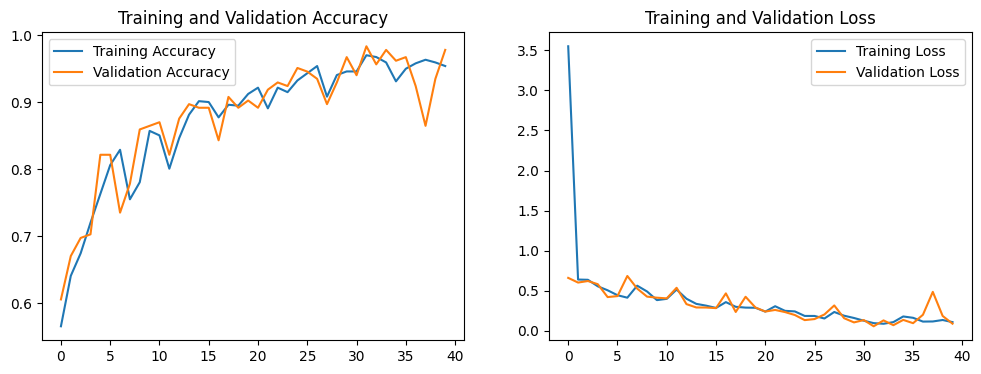

In [33]:
plot_training_history(history)

In [37]:
import numpy as np
img = tf.keras.utils.load_img(
    "img2.jpg", target_size=(350, 350)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 12ms/step
This image most likely belongs to Yes with a 72.17 percent confidence.


In [ ]:
model.save("my_model.keras")

In [38]:
import cv2

# Initialize the camera
cap = cv2.VideoCapture(0) # 0 is the index of the built-in camera, change if you have multiple cameras

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Capture frames from the camera
while True:
    ret, frame = cap.read() # read a frame from the camera

    import numpy as np
    img = tf.keras.utils.load_img(
    "img1.jpg", target_size=(256, 256)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    message = "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))


    if not ret:
        print("Error: Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow(message, frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 11ms/step


In [ ]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 4.0 MB/s eta 0:00:10
    --------------------------------------- 0.5/38.8 MB 4.8 MB/s eta 0:00:08
    --------------------------------------- 0.8/38.8 MB 5.2 MB/s eta 0:00:08
   - -------------------------------------- 1.1/38.8 MB 5.3 MB/s eta 0:00:08
   - -------------------------------------- 1.4/38.8 MB 5.4 MB/s eta 0:00:07
   - -------------------------------------- 1.6/38.8 MB 5.5 MB/s eta 0:00:07
   - -------------------------------------- 1.9/38.8 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.2/38.8 MB 5.7 MB/s eta 0:00:07
   -- ------------------------------------- 2.5/38.8 MB 5.8 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/38.8 MB 5.9 MB/s eta 0:00:07
   --- ------------------------------------ 3.1/38.8 MB 5.9 MB/s eta 0:00:07
   --- ------------------------------------ 3.5/38.8 MB 6.0 MB/s eta 0:00:06
   ---